In [2]:
import matplotlib.pyplot as plt
import numpy as np
print(np.__version__)
import torch 
import torch.nn as nn

import pandas as pd
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

2.2.3


# Generating random numbers from a categorical distribution






In [3]:
probs = torch.tensor([0.1, 0.2, 0.3, 0.4])
print(probs)

tensor([0.1000, 0.2000, 0.3000, 0.4000])


In [4]:
unif = torch.distributions.uniform.Uniform(0, 1)
print(unif.sample())

tensor(0.5789)


In [5]:
cum_sum_prob = torch.cumsum(probs, dim=0)
print(cum_sum_prob)

tensor([0.1000, 0.3000, 0.6000, 1.0000])


In [6]:
symbols  = torch.tensor([1, 2, 3, 4])
print(symbols)
sample = unif.sample()
print(sample)
if cum_sum_prob[0] > sample:
    print(symbols[0])
elif cum_sum_prob[1] > sample:
    print(symbols[1])
elif cum_sum_prob[2] > sample:
    print(symbols[2])
else:
    print(symbols[3])

tensor([1, 2, 3, 4])
tensor(0.9339)
tensor(4)


In [7]:
sample <= cum_sum_prob

tensor([False, False, False,  True])

In [8]:
symbols[sample < cum_sum_prob][0]

tensor(4)

In [9]:
### Even more efficient
index = torch.searchsorted(cum_sum_prob, sample)
print(symbols[index])

tensor(4)


In [10]:
### Vectorized
num_samples = 100000
unif_samples = unif.sample((num_samples,))

index = torch.searchsorted(cum_sum_prob, unif_samples)
our_samples = symbols[index]
print(our_samples)

tensor([4, 1, 4,  ..., 4, 4, 4])


(0.0, 0.5)

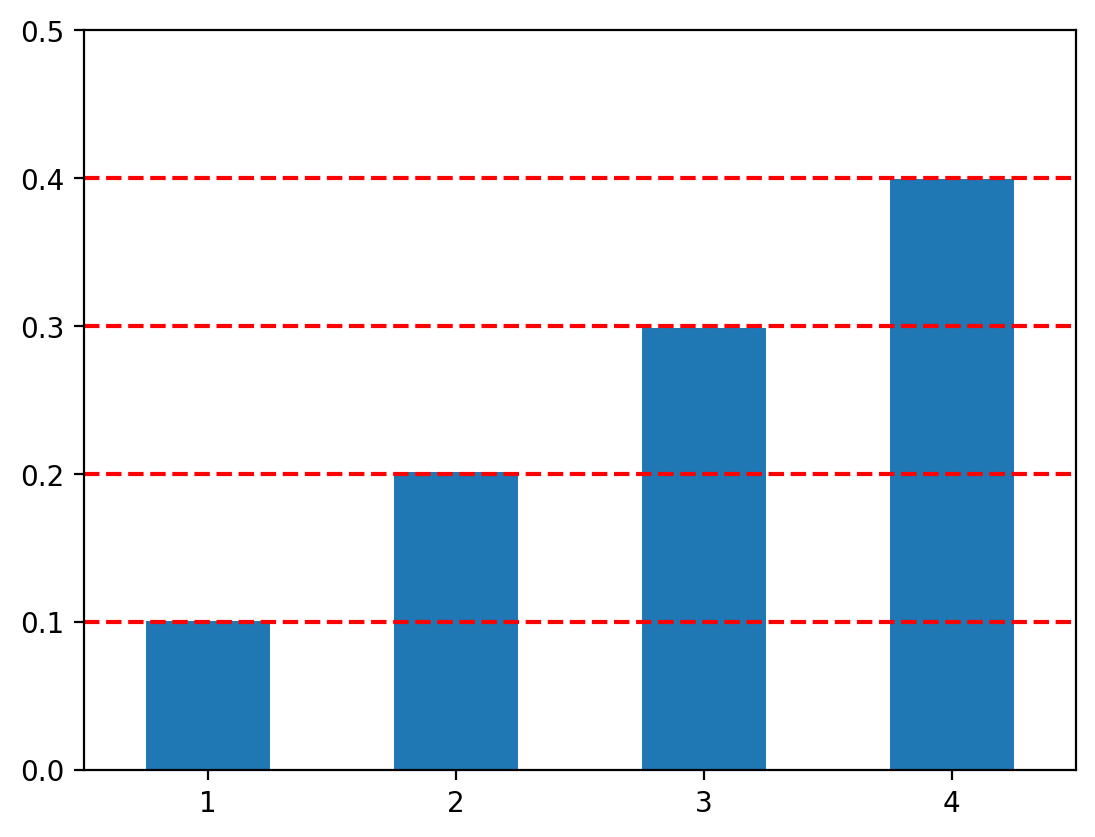

In [11]:
samples_series = pd.Series(our_samples)
samples_series_norm = samples_series.value_counts(normalize=True)
samples_series_norm.sort_index(inplace=True)
samples_series_norm.plot(kind='bar', rot=0)
for i in range(4):
    plt.axhline(probs[i].item(), color='r', linestyle='--')
plt.ylim(0, 0.5)

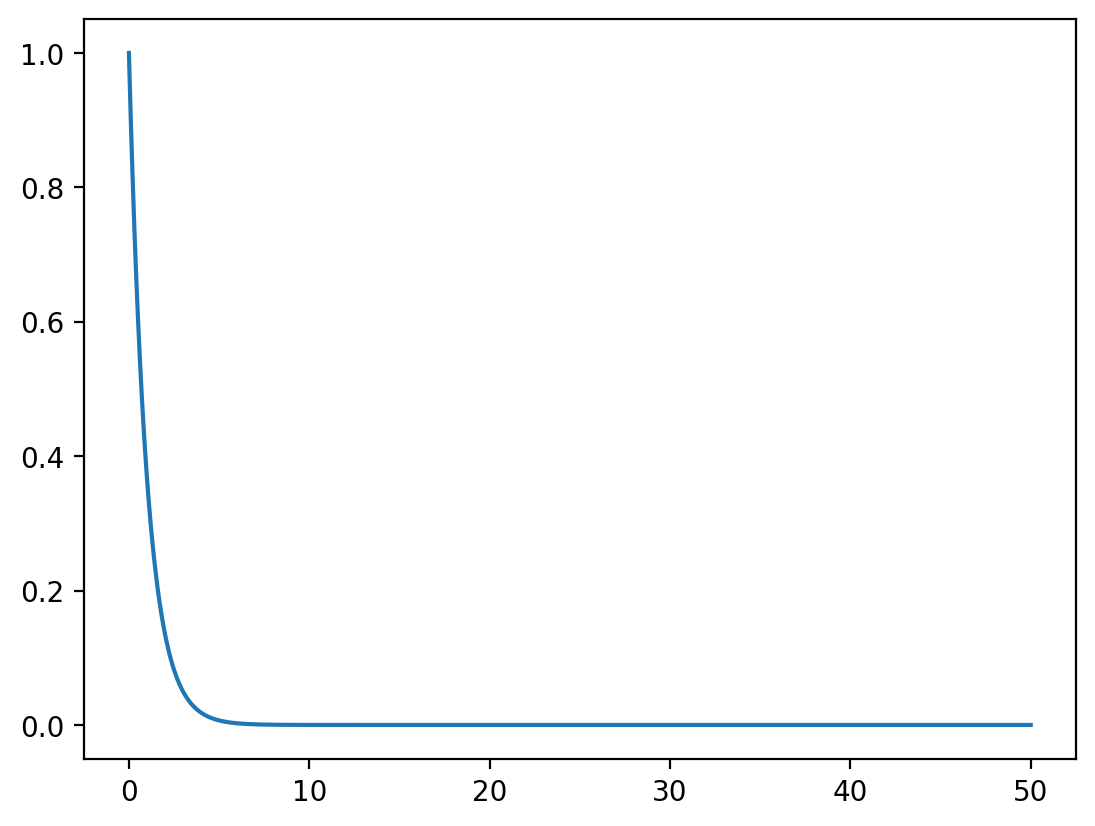

In [17]:
### Generating samples from exponential distribution
rate = 1
exp = torch.distributions.exponential.Exponential(rate)

x_range = torch.linspace(0, 50, 1000)
y = exp.log_prob(x_range).exp()
plt.plot(x_range, y)


In [18]:
def inv_cdf_exp(rate, u):
    return -torch.log(1-u)/rate

In [19]:
U = torch.distributions.uniform.Uniform(0, 1)
u_vec = U.sample((num_samples,))
x_vec = inv_cdf_exp(rate, u_vec)

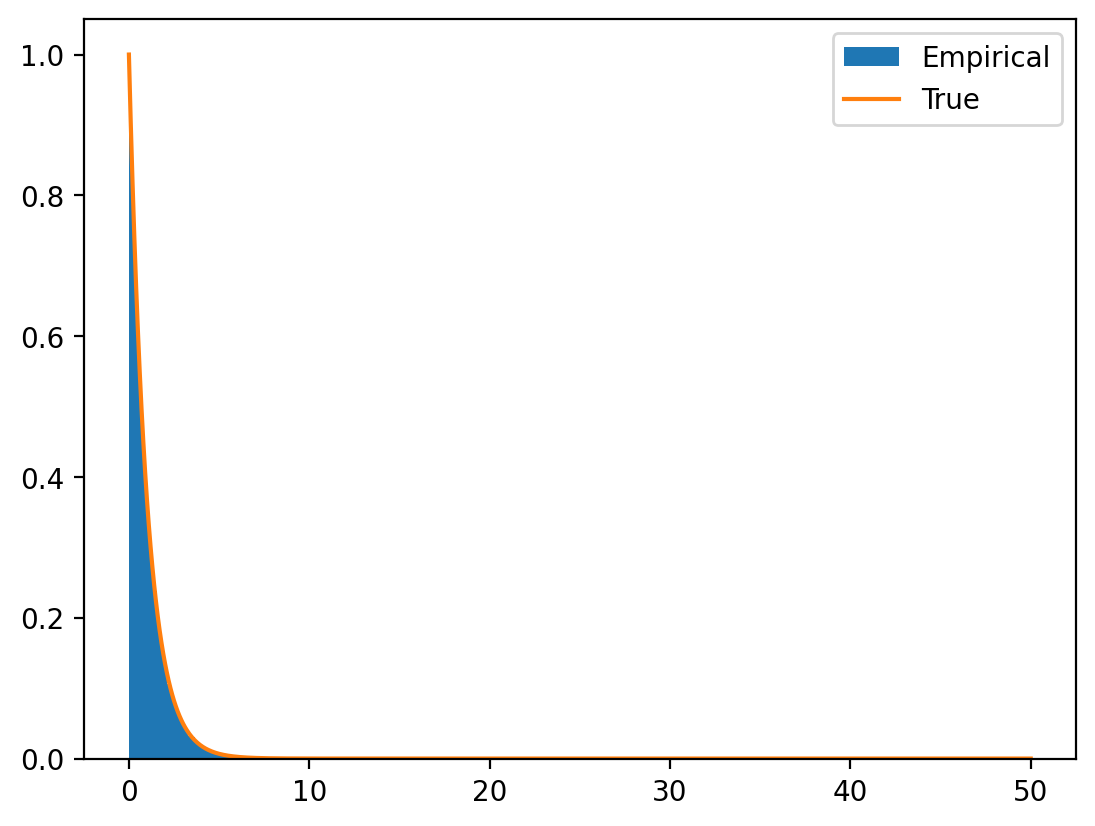

In [20]:
plt.hist(x_vec.numpy(), bins=100, density=True, label='Empirical')
plt.plot(x_range, y, label='True')
plt.legend()

In [36]:
## Generalised implementation when .icdf() is available

def inverse_cdf_sampling(distribution, sample_size=10000):
    """Performs inverse CDF sampling for a given torch distribution."""
    U = torch.rand(sample_size)  # Generate uniform samples
    X = distribution.icdf(U)     # Apply inverse CDF (quantile function)
    return X

In [12]:
X = torch.distributions.Normal(0, 1)
samples = inverse_cdf_sampling(X, 1000)

In [13]:
### Use CDF function
our_dist = torch.distributions.Normal(0, 1)
unif_samples = inverse_cdf_sampling(our_dist, 1000)




(array([0.00805124, 0.        , 0.01610249, 0.        , 0.01610249,
        0.00805124, 0.04830747, 0.04830747, 0.01610252, 0.02415369,
        0.04025626, 0.06440996, 0.06440996, 0.0724612 , 0.14492241,
        0.20933236, 0.1690763 , 0.19322987, 0.24153734, 0.28179357,
        0.31399854, 0.34620352, 0.34620352, 0.39451099, 0.39451099,
        0.34620352, 0.36230601, 0.42671597, 0.39451099, 0.39451099,
        0.28984481, 0.27374232, 0.28179357, 0.28984537, 0.30594671,
        0.24153781, 0.1368709 , 0.22543529, 0.08051229, 0.12882016,
        0.06440983, 0.03220504, 0.10466598, 0.03220504, 0.08051229,
        0.02415378, 0.04830738, 0.00805126, 0.00805123, 0.00805124]),
 array([-3.30904436, -3.18483996, -3.06063557, -2.93643117, -2.81222677,
        -2.68802238, -2.56381798, -2.43961358, -2.31540918, -2.19120502,
        -2.06700039, -1.94279611, -1.81859171, -1.69438732, -1.57018292,
        -1.44597852, -1.32177413, -1.19756985, -1.07336545, -0.94916105,
        -0.82495666, -0.70

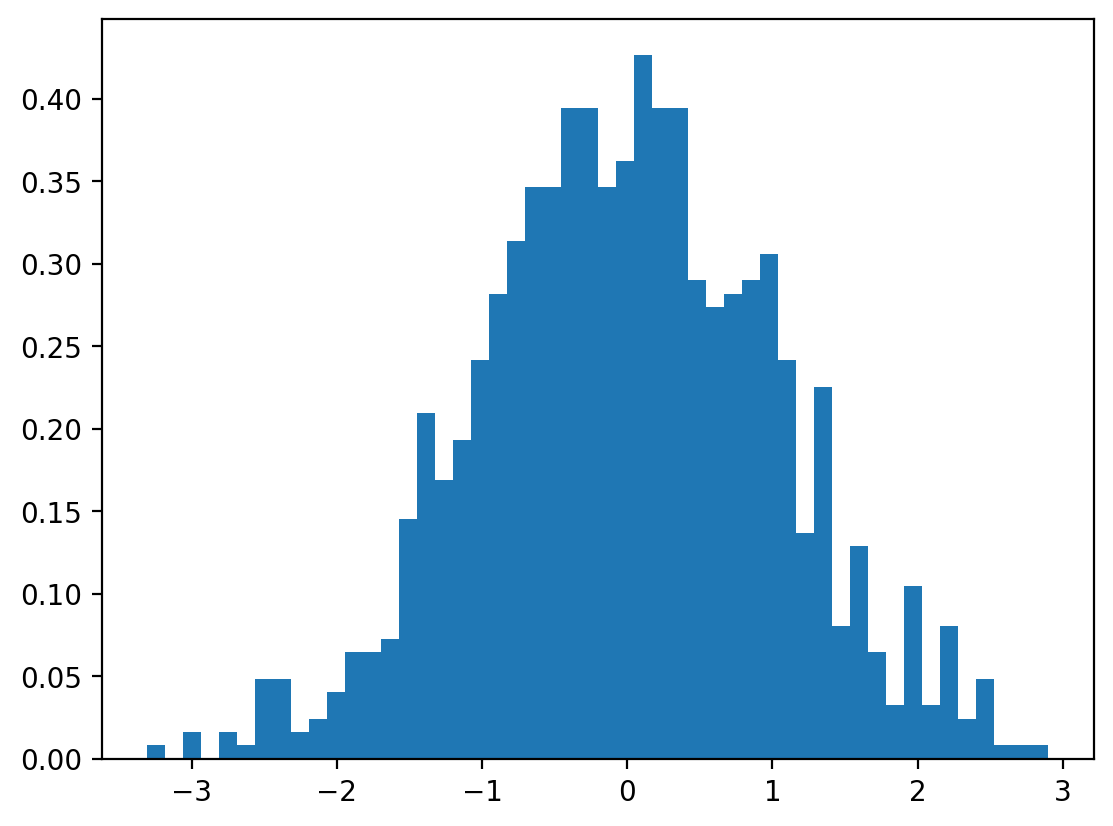

In [14]:
plt.hist(samples.numpy(), bins=50, density=True)